In [13]:
import glob
import keras
import zipfile
from keras import optimizers
from model import inceptionv2
import matplotlib.pyplot as plt
from preprocess import Preprocess
from train import root_mean_squared_error

In [14]:
# Decompress CLASH model

zipfilePath = ("./best_model_CLASH.zip")
zip = zipfile.ZipFile(zipfilePath)
zip.extractall(".")
zip.close()

In [15]:
# Compile the network 

model = inceptionv2()
model.load_weights("best_model_CLASH.hdf5")
model.compile(loss = root_mean_squared_error,
                          optimizer=keras.optimizers.Adam(lr=5e-5))

In [16]:
# Load galaxies to predict

path = 'galaxies_to_predict/'
galaxies = glob.glob(path + '*.fits')
galaxies = [x.split(path)[1].split('.fits')[0] for x in galaxies]

prep = Preprocess(galaxies, path)
X = prep.get_images()
    

Probabilities => Spheroid: 0.5755, Disk: 0.2351, Irregular: 0.0538, Point Source: 0.0821, Unclassifiable: 0.0536


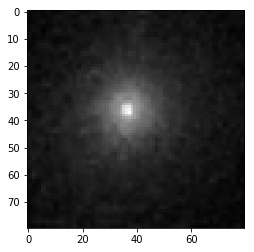

In [53]:
# Predict

probs = model.predict(X)

plt.imshow(X[0].reshape(80,80), cmap = 'gray')
print('Probabilities => Spheroid: {0:.4f}, Disk: {1:.4f}, Irregular: {2:.4f}, Point Source: {3:.4f}, '
      'Unclassifiable: {4:.4f}'.format(probs[0][0], probs[0][1], probs[0][2], probs[0][3], probs[0][4]))
